In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

In [13]:
test_dir = "splitdata/test"
train_dir = "splitdata/train"
val_dir = "splitdata/val"

In [14]:
#DISINI SAYA MENGGUNAKAN MODEL VGG16

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

base_model = VGG19(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = False

In [15]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [16]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    prediction_layer
])

In [17]:
image_shape = (150,150,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [18]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')

Found 5062 images belonging to 2 classes.


In [19]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 722 images belonging to 2 classes.


In [20]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 1448 images belonging to 2 classes.


In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.000024),
              metrics=['acc'])

#es = EarlyStopping(monitor='val_acc', mode='max', patience=5, restore_best_weights=True)

In [22]:
results = model.fit(train_image_gen,epochs=100, validation_data=val_image_gen)

Epoch 1/100
159/159 [==============================] - 46s 285ms/step - loss: 0.5534 - acc: 0.7639 - val_loss: 0.4653 - val_acc: 0.8296
Epoch 2/100
159/159 [==============================] - 41s 258ms/step - loss: 0.4429 - acc: 0.8104 - val_loss: 0.4162 - val_acc: 0.8296
Epoch 3/100
159/159 [==============================] - 42s 264ms/step - loss: 0.4169 - acc: 0.8230 - val_loss: 0.4007 - val_acc: 0.8435
Epoch 4/100
159/159 [==============================] - 44s 277ms/step - loss: 0.4005 - acc: 0.8260 - val_loss: 0.3870 - val_acc: 0.8338
Epoch 5/100
159/159 [==============================] - 45s 282ms/step - loss: 0.3861 - acc: 0.8331 - val_loss: 0.3749 - val_acc: 0.8380
Epoch 6/100
159/159 [==============================] - 47s 292ms/step - loss: 0.3770 - acc: 0.8380 - val_loss: 0.3650 - val_acc: 0.8352
Epoch 7/100
159/159 [==============================] - 51s 318ms/step - loss: 0.3709 - acc: 0.8376 - val_loss: 0.3664 - val_acc: 0.8518
Epoch 8/100
159/159 [===========================

159/159 [==============================] - 47s 294ms/step - loss: 0.2473 - acc: 0.9024 - val_loss: 0.2478 - val_acc: 0.8961
Epoch 61/100
159/159 [==============================] - 47s 291ms/step - loss: 0.2508 - acc: 0.8933 - val_loss: 0.2423 - val_acc: 0.8975
Epoch 62/100
159/159 [==============================] - 47s 296ms/step - loss: 0.2418 - acc: 0.8937 - val_loss: 0.2279 - val_acc: 0.9114
Epoch 63/100
159/159 [==============================] - 46s 287ms/step - loss: 0.2460 - acc: 0.8998 - val_loss: 0.2330 - val_acc: 0.9058
Epoch 64/100
159/159 [==============================] - 48s 301ms/step - loss: 0.2414 - acc: 0.9002 - val_loss: 0.2260 - val_acc: 0.8989
Epoch 65/100
159/159 [==============================] - 47s 294ms/step - loss: 0.2392 - acc: 0.9006 - val_loss: 0.2277 - val_acc: 0.9003
Epoch 66/100
159/159 [==============================] - 46s 289ms/step - loss: 0.2414 - acc: 0.9024 - val_loss: 0.2485 - val_acc: 0.8947
Epoch 67/100
159/159 [==============================] 

In [23]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,acc,val_loss,val_acc
0,0.553355,0.763927,0.465302,0.829640
1,0.442932,0.810352,0.416173,0.829640
2,0.416869,0.822995,0.400676,0.843490
3,0.400475,0.825958,0.386952,0.833795
4,0.386063,0.833070,0.374931,0.837950
...,...,...,...,...
95,0.230466,0.903595,0.206497,0.911357
96,0.218941,0.907546,0.220662,0.903047
97,0.215528,0.913868,0.234316,0.898892
98,0.216737,0.910707,0.211505,0.901662


<AxesSubplot:>

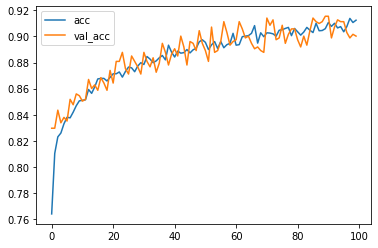

In [24]:
loss_df[['acc', 'val_acc']].plot()

<AxesSubplot:>

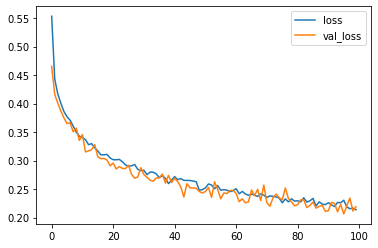

In [25]:
loss_df[['loss', 'val_loss']].plot()

In [26]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       724
           1       0.89      0.91      0.90       724

    accuracy                           0.90      1448
   macro avg       0.90      0.90      0.90      1448
weighted avg       0.90      0.90      0.90      1448



[[643  81]
 [ 67 657]]


<AxesSubplot:>

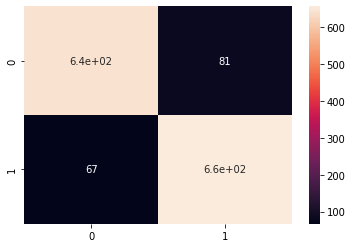

In [27]:
print(confusion_matrix(test_image_gen.classes,predictions))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions), annot = True)

Confusion matrix, without normalization
[[643  81]
 [ 67 657]]


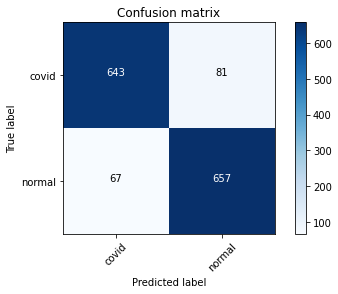

In [28]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_image_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_image_gen.class_indices)

In [29]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_test_rock = os.path.join('splitdata/test/covid')
file_test_paper = os.path.join('splitdata/test/normal')

rock_image = os.listdir(file_test_rock)
paper_image = os.listdir(file_test_paper)

fRock = [os.path.join(file_test_rock,fname)
        for fname in rock_image[0:5]]

fPaper = [os.path.join(file_test_paper,fname)
        for fname in paper_image[0:5]]

xz = 0

In [30]:
from PIL import Image
import time
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

labels = ['Covid', 'Normal']
labels2 = ['Covid', 'Normal']
value = [fRock, fPaper]
input_size = (150, 150)

title = []
prediksi = []
waktu = []
akurasi = []

for x in list(range(len(labels))):
  for gambar in value[x]:
    title.append(labels2[x])
    im = Image.open(gambar)
    X = preprocess(im, input_size)
    X = reshape([X])
    start = time.time()
    Y = model.predict(X)
    end = time.time()
    times = end-start
    prediksi.append(labels[np.argmax(Y)])
    waktu.append(times)
    akurasi.append(np.max(Y))

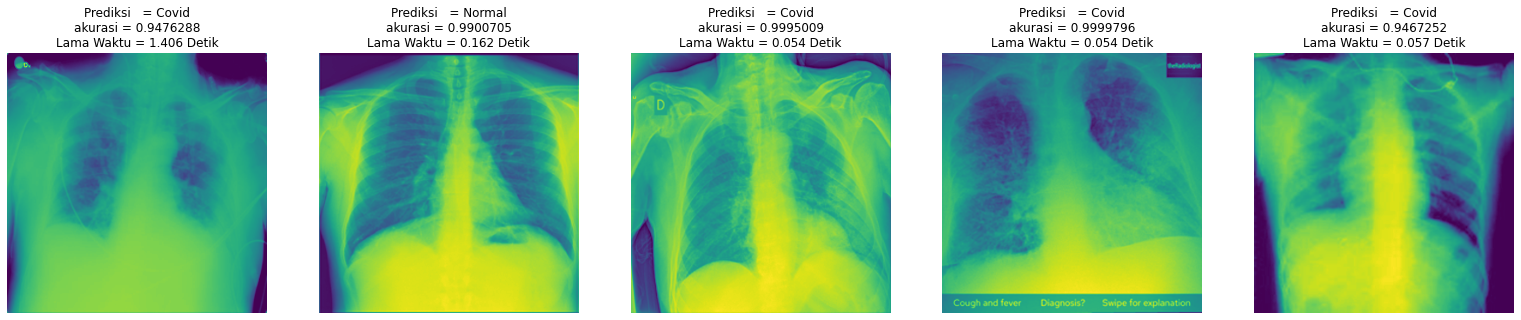

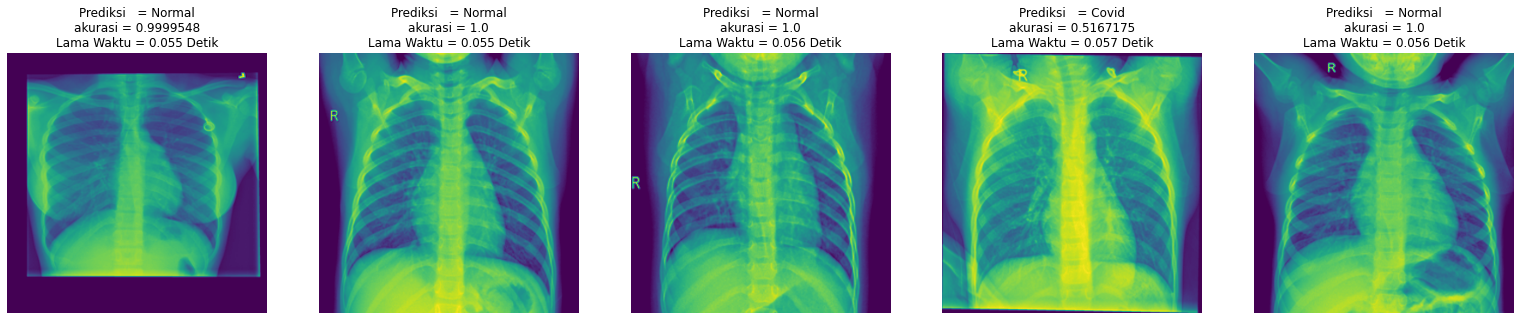

In [31]:
ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fRock):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()

ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fPaper):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()